In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from src.data_reading import read_movies_file, read_users_file, read_ratings_file 

In [4]:
movies = read_movies_file() 
ratings = read_ratings_file() 
users = read_users_file()

In [5]:
ratings.head(2)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [24]:
# Let's conduct the sparsity analysis
n_users = ratings.user_id.nunique()
n_movies = ratings.movie_id.nunique()
n_ratings = ratings.shape[0]

sparsity = np.round((1 - n_ratings / (n_users * n_movies)) * 100, 2)
sparsity

np.float64(95.53)

The sparsity level in our dataset is 95.53%, that means that the data is sparse, but not very sparse.

In [32]:
ratings_per_user = ratings.groupby('user_id').size()
ratings_per_user.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64

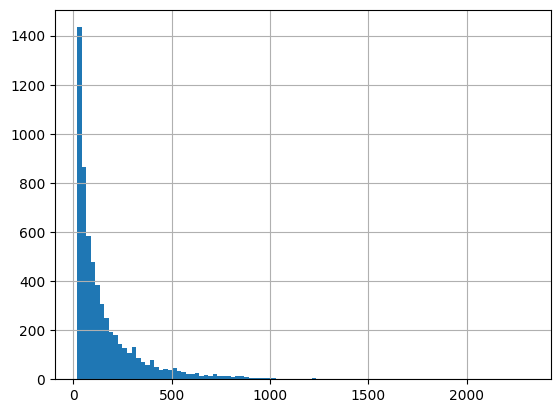

In [34]:
ratings_per_user.hist(bins=100)
plt.show()

In the dataset there is no users with less than 20 ratings, so we can say there is no cold starts users at least in the dataset.